<a href="https://colab.research.google.com/github/DanielAlvaradejo/inmersion-alura/blob/main/credito_banco_aleman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INMERSION DE DATOS CON PYTHON

In [34]:
# prompt: importa los siguientes modulos con sus respectivos alias: pandas matplotlib seaborn drive de google colab warningsr

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings

drive.mount('/content/Drive')
warnings.filterwarnings('ignore')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [35]:
pd.set_option('display.max_columns',None)
global df_banco, resultados

In [36]:
df_banco = pd.read_csv('/content/Drive/MyDrive/german/german_credit.csv')
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [37]:
df_banco.shape

(1000, 21)

In [38]:
df_banco.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [39]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [40]:
df_banco.account_check_status.value_counts().index

Index(['no checking account', '< 0 DM', '0 <= ... < 200 DM',
       '>= 200 DM / salary assignments for at least 1 year'],
      dtype='object')

In [41]:
columnas = list(df_banco.select_dtypes(include=['object']).columns)
for columna in columnas:
  print(f'El nombre de la culmna es: {columna}')
  print(list(df_banco[f'{columna}'].value_counts().index))
  print('\n')

El nombre de la culmna es: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


El nombre de la culmna es: credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


El nombre de la culmna es: purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']


El nombre de la culmna es: savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']


El nombre de la culmna es: present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']


El nombre de la culmna es: personal_status_sex
['male : sin

In [42]:
# dic = {'yes':1,'no':0}
# df_banco['foreign_worker'] = df_banco['foreign_worker'].map(dic)
# df_banco['foreign_worker']

In [43]:
def procesar_datos():
  global df_banco
  df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any() else df_banco
  df_banco = df_banco.dropna() if df_banco.isnull().values.any() else df_banco

  a = {'no checking account': 4,
      '>= 200 DM / salary assignments for at least 1 year': 3,
      '0 <= ... < 200 DM': 2,
      '< 0 DM': 1
  }
  df_banco['account_check_status'] = df_banco['account_check_status'].map(a)

  a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
  }
  df_banco['credit_history'] = df_banco['credit_history'].map(a)

  a = {'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
  }
  df_banco['purpose'] = df_banco['purpose'].map(a)

  a = {'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5
  }
  df_banco['savings'] = df_banco['savings'].map(a)

  a = {'.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5
  }
  df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a)

  a = {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
  }
  df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a)

  a = {'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3
  }
  df_banco['other_debtors'] = df_banco['other_debtors'].map(a)

  a = {'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4
  }
  df_banco['property'] = df_banco['property'].map(a)

  a = {'bank' : 1,
      'stores' : 2,
      'none' : 3
  }
  df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a)

  a = {'rent' : 1,
      'own' : 2,
      'for free' : 3
  }
  df_banco['housing'] = df_banco['housing'].map(a)

  a = {'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
  }
  df_banco['job'] = df_banco['job'].map(a)

  a = {'yes, registered under the customers name ' : 1,
      'none' : 0
  }
  df_banco['telephone'] = df_banco['telephone'].map(a)

  a = {'yes' : 1,
      'no' : 0
  }
  df_banco['foreign_worker'] = df_banco['foreign_worker'].map(a)

In [44]:
procesar_datos()
df_banco.sample(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
962,0,4,15,3,1,3556,1,3,3,3,1,2,4,29,3,2,1,3,1,0,1
930,0,1,24,3,4,1747,5,4,4,3,2,1,2,24,3,2,1,2,1,0,0
609,0,4,15,3,2,1300,1,1,4,3,1,4,4,45,1,3,1,3,2,0,1


In [45]:
variables_discretas = ['personal_status_sex','age',
                       'duration_in_month','credit_amount','default']
df_banco[variables_discretas].tail(3)

,personal_status_sex,age,duration_in_month,credit_amount,default
997,3,38,12,804,0
998,3,23,45,1845,1
999,3,27,45,4576,0


In [46]:
def feature_engineering():
  global df_banco
  dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
  dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}
  df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)
  df_banco['rango_edad'] = pd.cut(x = df_banco['age'],
                                  bins=[18, 30, 40, 50, 60, 70, 80],
                                  labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_plazos_credito']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 60, 72],
                                            labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)
  df_banco = df_banco.drop(columns=['personal_status_sex','age',
                                    'duration_in_month','credit_amount'])

In [47]:
feature_engineering()
df_banco.head(2)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6


In [48]:
df_banco.describe()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,0.404000,0.963000,0.310000,0.54800,2.027000,1.975000,3.766000
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.462725,0.49794,1.136469,0.968149,2.821206
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,2.000000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.00000,2.000000,2.000000,3.000000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,2.000000,4.000000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.00000,6.000000,6.000000,19.000000


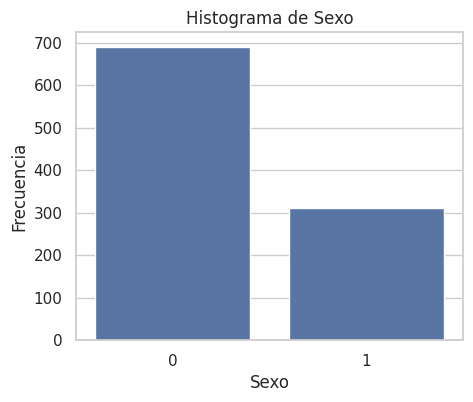

In [49]:
# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Crear el histograma utilizando Seaborn
plt.figure(figsize=(5, 4))
sns.countplot(data=df_banco, x='sexo')
plt.title('Histograma de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

In [50]:
def analisis_exploratorio():
  global df_banco
  histogramas = ['sexo','estado_civil','rango_plazos_credito','rango_edad','default']
  lista_histogramas = list(enumerate(histogramas))
  plt.figure(figsize = (30,20))
  plt.title('Histogramas')
  for i in lista_histogramas:
    plt.subplot(3, 2, i[0]+1)
    sns.countplot(x = i[1], data = df_banco)
    plt.xlabel(i[1], fontsize=20)
    plt.ylabel('Total', fontsize=20)

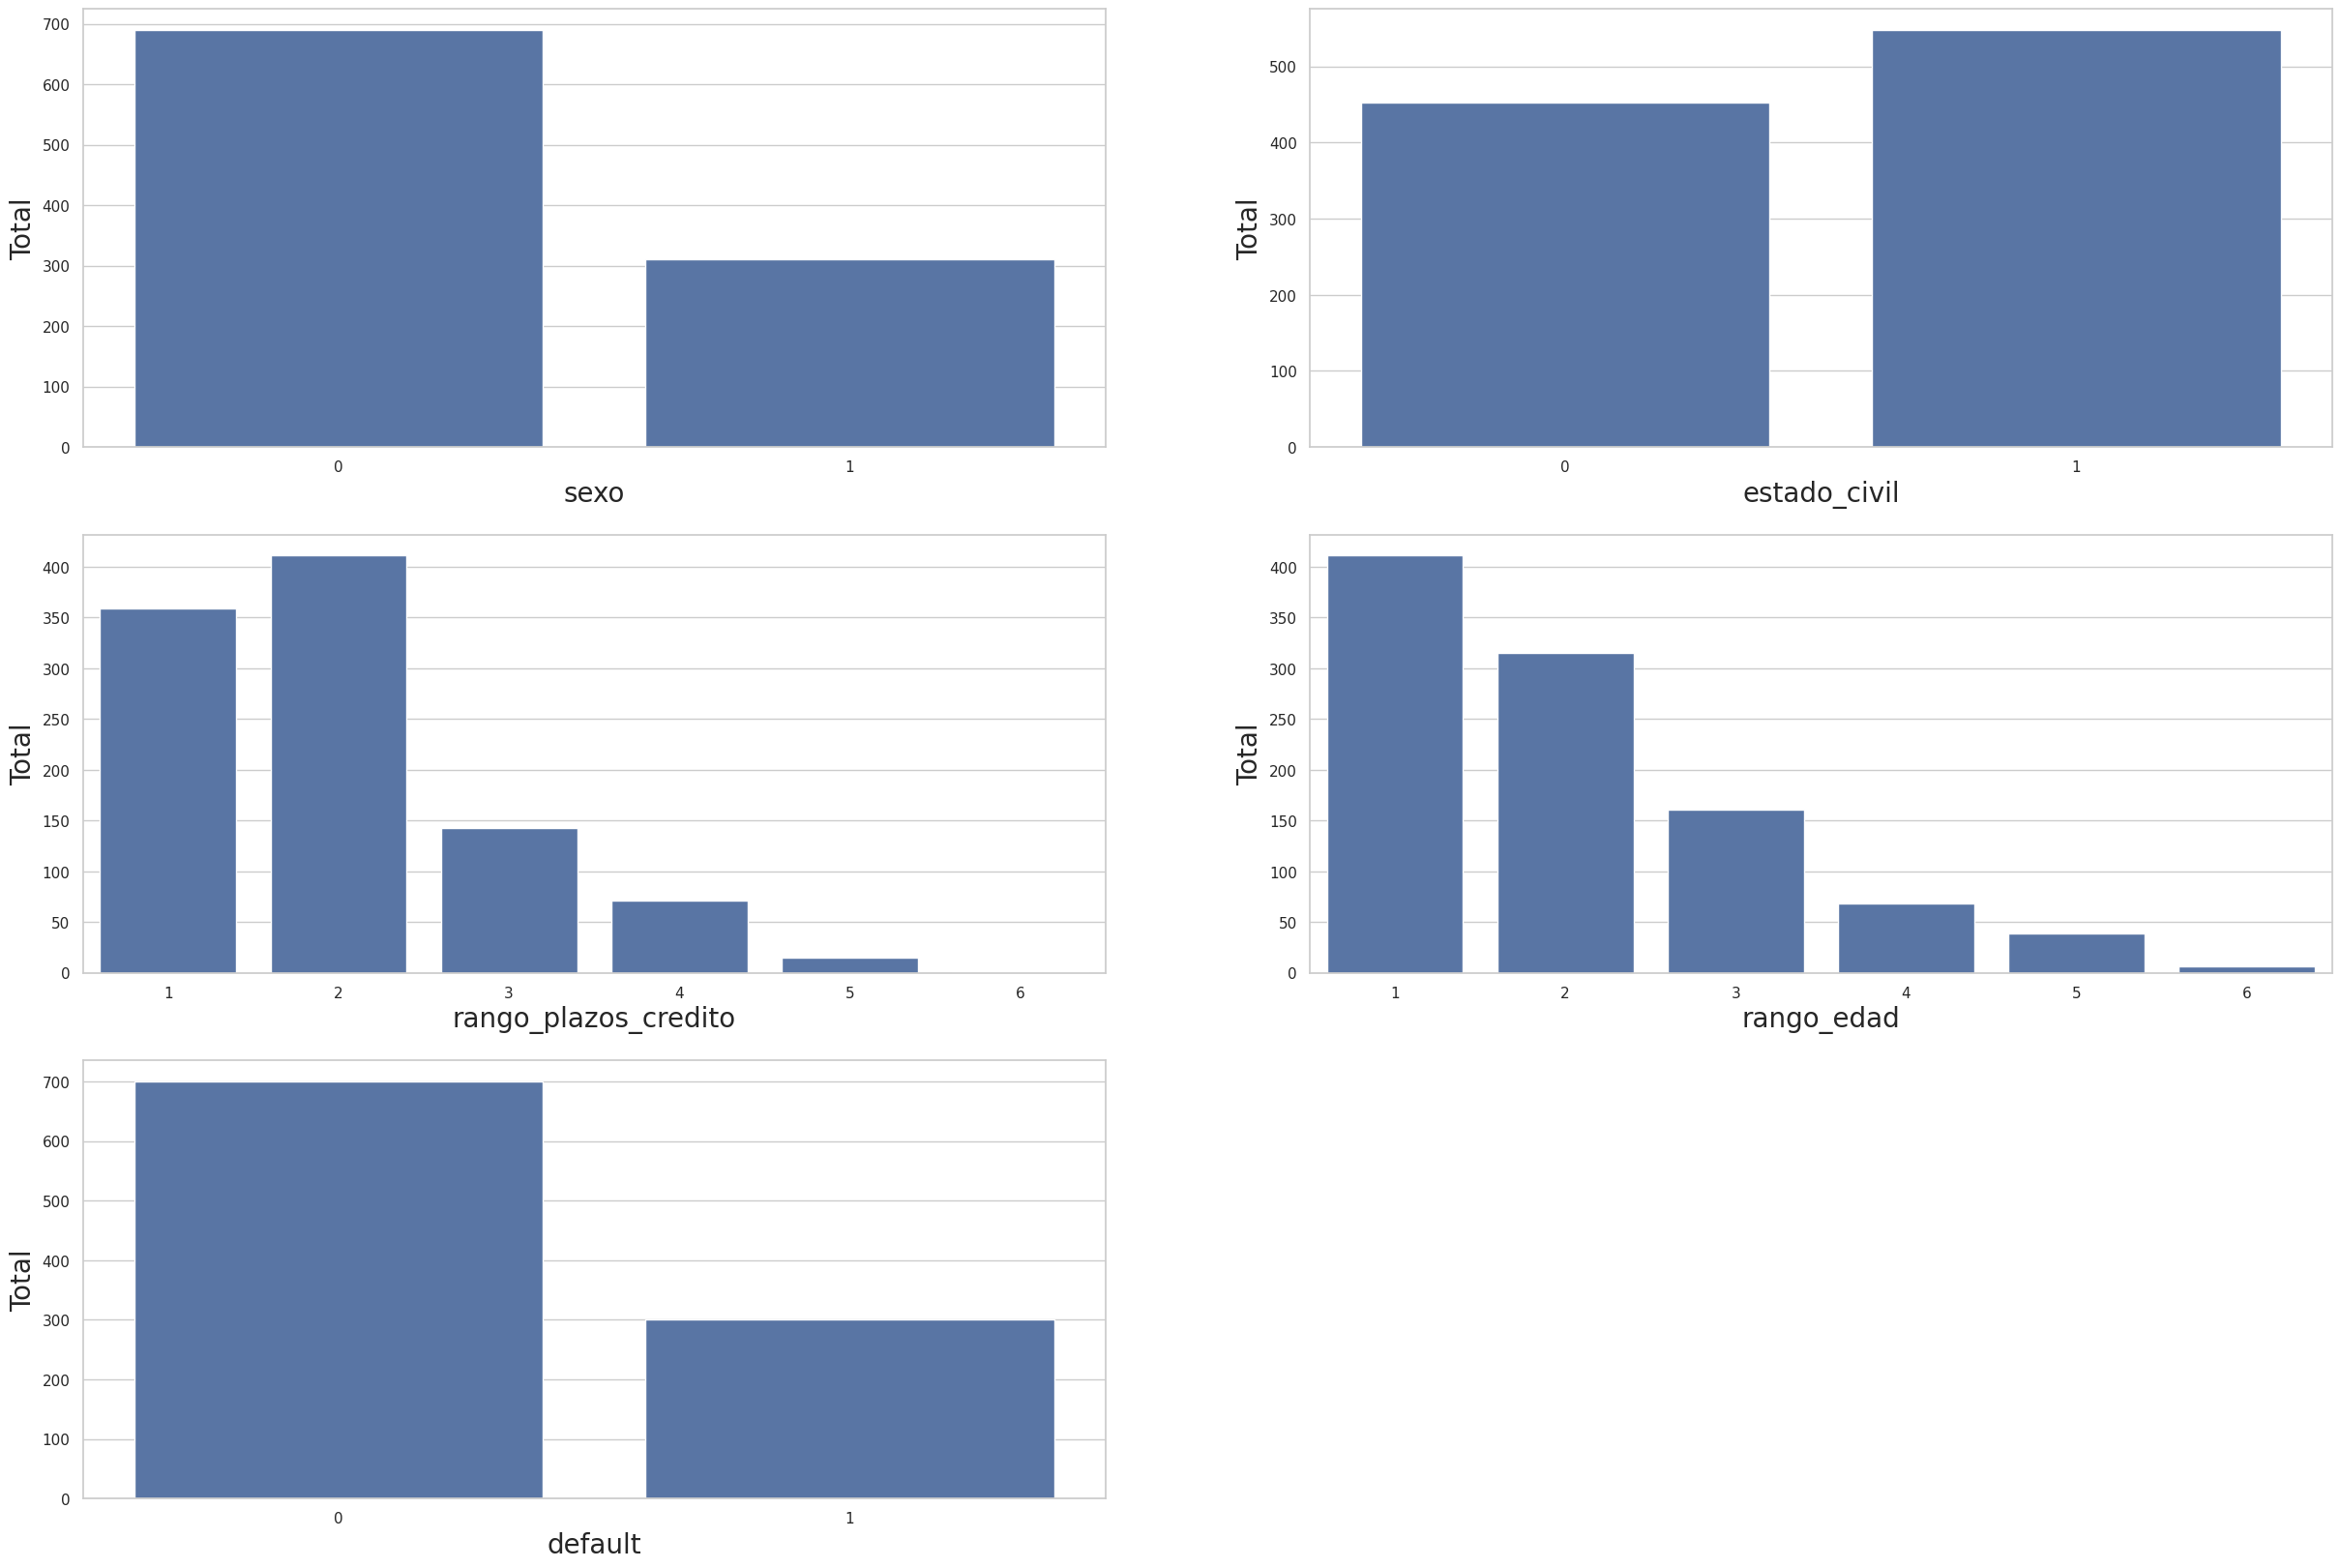

In [51]:
analisis_exploratorio()

# Desafíos

1. Analizar los datos de las distribuciones e identificar si hay algún valor o registros que no se deben considerar para el modelo.
2. Investigar qué es y como crear un mapa de calor para analizar la correlación de las variables.
3. Crear una conclusión para cada uno de los gráficos del histograma. Mirar los datos y extraer conclusiones, porque es una habilidad esencial.

##Desafío 1

Analizando los histogramas podemos notar las siguientes correcciones posibles:

Para el rango de **Rango de plazo de créditos** se podría juntar el de 60 meses y 72 meses en un solo rango ya que es muy pequeña la cantidad de clientes que están entre estos plazos.

Igualmente para el **Rango de edad** la sección de 70 años y 80 años puede juntarse en el mismo rango porque la cantidad también es pequeña.

## Desafío 2

Para crear el mapa de calor y que este tenga como argumento las columnas deseadas a graficar utilizamos el siguiente código

In [52]:
def mapa_calor(columnas=None):
    global df_banco

    # Seleccionar todas las columnas si no se proporcionan columnas específicas
    if columnas is None:
        df_seleccionado = df_banco
    else:
        df_seleccionado = df_banco[columnas]

    # Crear un mapa de calor para la correlación entre variables seleccionadas
    plt.figure(figsize=(15, 10))
    plt.title('Mapa de Calor - Correlación', fontsize=20)

    corr_matrix = df_seleccionado.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

    plt.show()

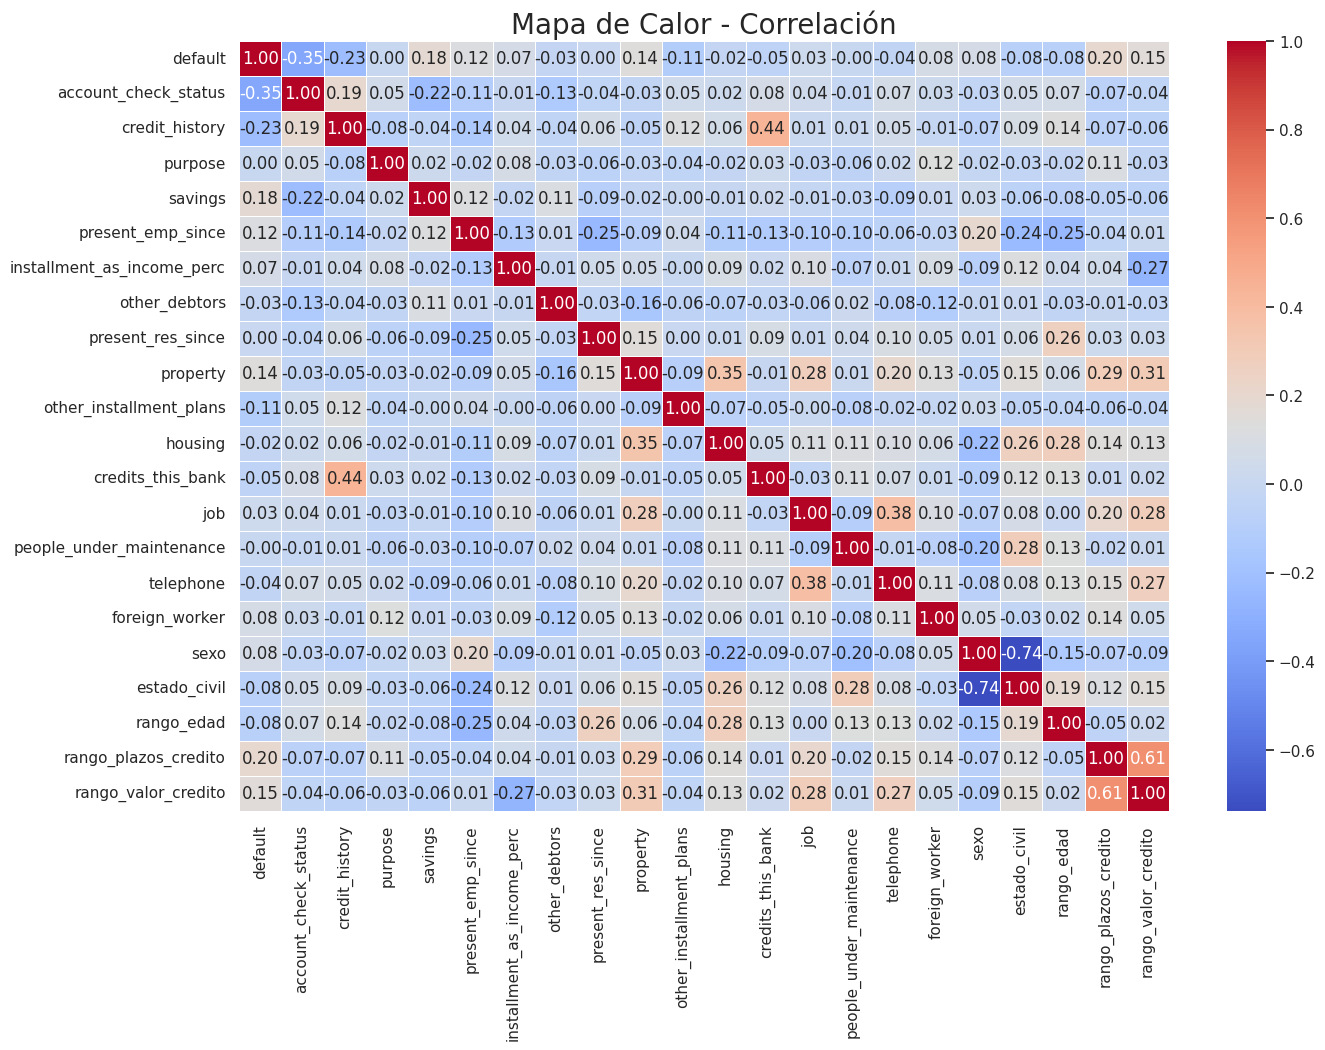

In [53]:
mapa_calor()

El mapa de calor para las columnas de nuestro interés queda de la siguiente manera

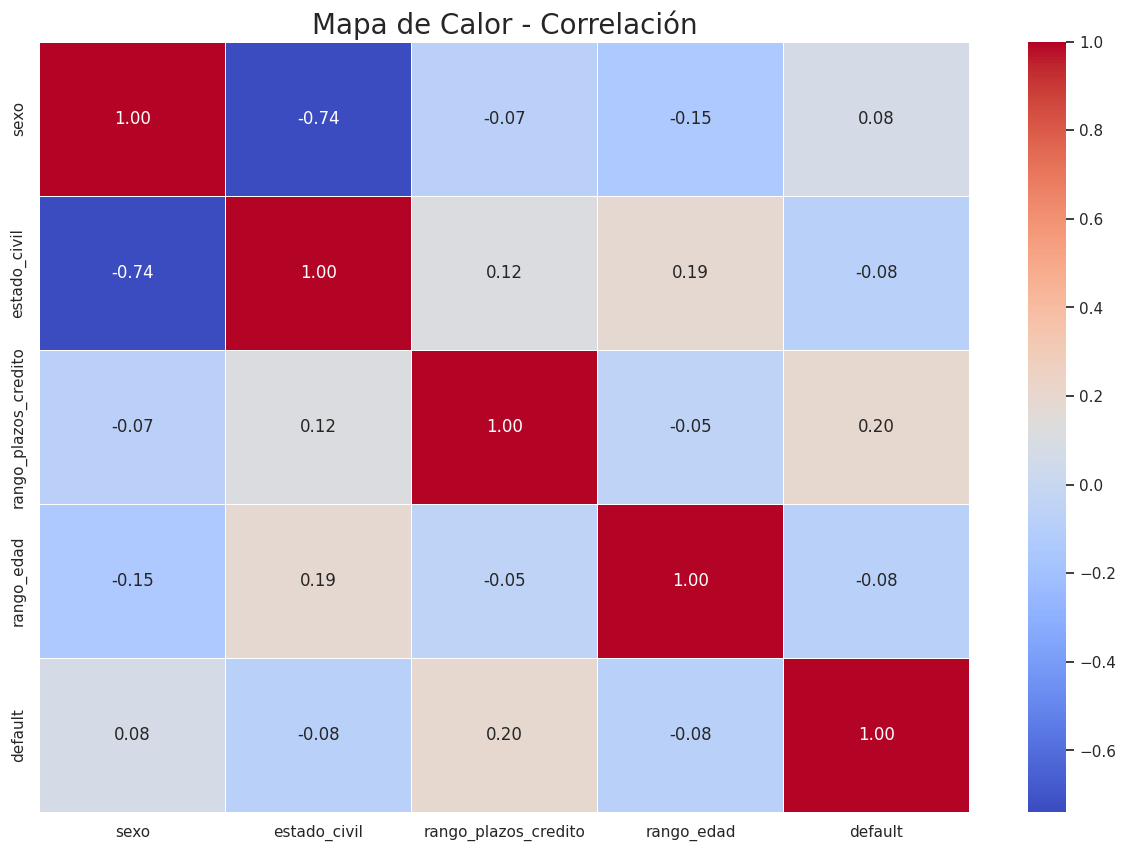

In [54]:
columnas_deseadas = ['sexo', 'estado_civil', 'rango_plazos_credito', 'rango_edad', 'default']
mapa_calor(columnas_deseadas)

##Desafío 3

Para poder extraer las conclusiones, generé un código que evalúa el porcentaje de clientes que existe en los rangos definidos en las funciones anterioirmente declaradas, decidí hacerlo en una función **analizar_conclusiones** ya que esto evita que tengamos que generar código nuevo para cada columna de interés, de este modo podemos poner como argumento la columna o columnas deseadas a evaluar.

In [55]:
def analizar_conclusiones(columnas):
    global df_banco

    # Verificar si todas las columnas existen en el DataFrame
    columnas_no_existentes = [col for col in columnas if col not in df_banco.columns]
    if columnas_no_existentes:
        print(f"Las columnas {columnas_no_existentes} no existen en el DataFrame.")
        return

    # Calcular y mostrar el porcentaje para cada columna en la lista
    for columna in columnas:
        porcentajes = df_banco[columna].value_counts(normalize=True) * 100

        # Imprimir los resultados para cada columna
        print(f"Porcentajes de '{columna}':")
        for categoria, porcentaje in porcentajes.items():
            print(f"Porcentaje de {categoria}: {porcentaje:.1f} %")

        # Obtener la categoría con el mayor porcentaje
        categoria_mayor_porcentaje = porcentajes.idxmax()
        porcentaje_mayor = porcentajes.max()

        # Imprimir la leyenda para cada columna
        print(f"\nLa mayor cantidad de clientes en '{columna}' son: {categoria_mayor_porcentaje} con un porcentaje de {porcentaje_mayor:.1f} %\n")


In [56]:
columnas_deseadas = ['sexo', 'estado_civil', 'rango_plazos_credito', 'rango_edad', 'default']
analizar_conclusiones(columnas_deseadas)

Porcentajes de 'sexo':
Porcentaje de 0: 69.0 %
Porcentaje de 1: 31.0 %

La mayor cantidad de clientes en 'sexo' son: 0 con un porcentaje de 69.0 %

Porcentajes de 'estado_civil':
Porcentaje de 1: 54.8 %
Porcentaje de 0: 45.2 %

La mayor cantidad de clientes en 'estado_civil' son: 1 con un porcentaje de 54.8 %

Porcentajes de 'rango_plazos_credito':
Porcentaje de 2: 41.1 %
Porcentaje de 1: 35.9 %
Porcentaje de 3: 14.3 %
Porcentaje de 4: 7.1 %
Porcentaje de 5: 1.5 %
Porcentaje de 6: 0.1 %

La mayor cantidad de clientes en 'rango_plazos_credito' son: 2 con un porcentaje de 41.1 %

Porcentajes de 'rango_edad':
Porcentaje de 1: 41.1 %
Porcentaje de 2: 31.5 %
Porcentaje de 3: 16.1 %
Porcentaje de 4: 6.8 %
Porcentaje de 5: 3.9 %
Porcentaje de 6: 0.6 %

La mayor cantidad de clientes en 'rango_edad' son: 1 con un porcentaje de 41.1 %

Porcentajes de 'default':
Porcentaje de 0: 70.0 %
Porcentaje de 1: 30.0 %

La mayor cantidad de clientes en 'default' son: 0 con un porcentaje de 70.0 %



# Construcción de Modelos


In [57]:
# prompt: importar las siguientes bibliotecas: train_test_split, LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GaussianNB, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [58]:
# prompt: ejemplo de modelo de machine learning de clasificacion

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Preprocesar los datos
# ... (your preprocessing code here)

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X = df_banco.drop('default', axis=1)
y = df_banco['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 3. Entrenar el modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# 4. Evaluar el modelo
predicciones = modelo.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)
print(f'Accuracy: {accuracy}')

# 5. Mejorar el modelo (opcional)
# ... (your model improvement code here)


Accuracy: 0.772


In [59]:
#@title
def crea_modelos():
  global df_banco, resultados
  y = df_banco['default']
  x = df_banco.drop(columns='default')
  train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)

  models = {
      'Regresión Logística': LogisticRegression(),
      'Árbol de Decisión': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Naive Bayes': GaussianNB()
  }

  results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

  for name, model in models.items():
      model.fit(train_x, train_y)
      predictions = model.predict(test_x)
      accuracy = accuracy_score(test_y, predictions)
      precision = precision_score(test_y, predictions)
      recall = recall_score(test_y, predictions)
      f1 = f1_score(test_y, predictions)
      if hasattr(model, "predict_proba"):
          proba = model.predict_proba(test_x)
          roc_auc = roc_auc_score(test_y, proba[:, 1])
      else:
          roc_auc = None

      results['Model'].append(name)
      results['Accuracy'].append(accuracy)
      results['Precision'].append(precision)
      results['Recall'].append(recall)
      results['F1-score'].append(f1)
      results['AUC-ROC'].append(roc_auc)

  resultados = results

In [60]:
crea_modelos()
for i,model in enumerate(resultados['Model']):
  print(model)
  print(resultados['Accuracy'][i])
  print(resultados['Precision'][i])
  print(resultados['Recall'][i])
  print(resultados['F1-score'][i])
  print(resultados['AUC-ROC'][i])
  print('\n')

Regresión Logística
0.78
0.6785714285714286
0.4418604651162791
0.5352112676056338
0.799934796783308


Árbol de Decisión
0.7066666666666667
0.48717948717948717
0.4418604651162791
0.46341463414634154
0.6274722886329058


Random Forest
0.7933333333333333
0.7222222222222222
0.45348837209302323
0.557142857142857
0.7855085850901977


Naive Bayes
0.74
0.5465116279069767
0.5465116279069767
0.5465116279069767
0.7800478156922409




# Evaluación y selección del modelo

In [95]:
#@title
def visualiza_resultados():
  global df_banco, resultados
  results_df = pd.DataFrame(resultados)
  results_df.set_index('Model', inplace=True)

  # Transponer el DataFrame para facilitar la representación
  results_df = results_df.T
  colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']

  # Gráfico de barras agrupadas para cada métrica
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
  plt.title('Comparación de Métricas por Modelo')
  plt.xlabel('Métricas')
  plt.ylabel('Puntuación')
  plt.legend(title='Modelos')
  plt.tight_layout()
  plt.show()

  # @title Texto de título predeterminado
  from IPython.display import HTML, display

  # Texto que quieres centrar
  texto = "Comparativa de modelos"

  # Crear una celda HTML con el texto centrado
  display(HTML(f"<center><h2>{texto}</h2></center>"))

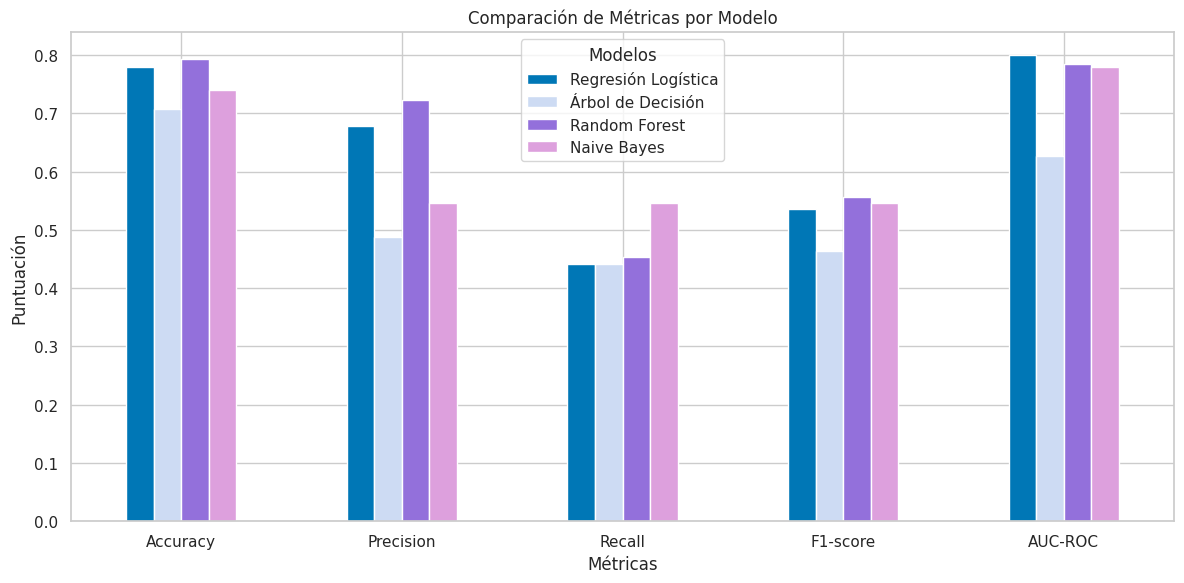

In [62]:
visualiza_resultados()

##Desafío 1

Evaluar la Matrix de Confusión

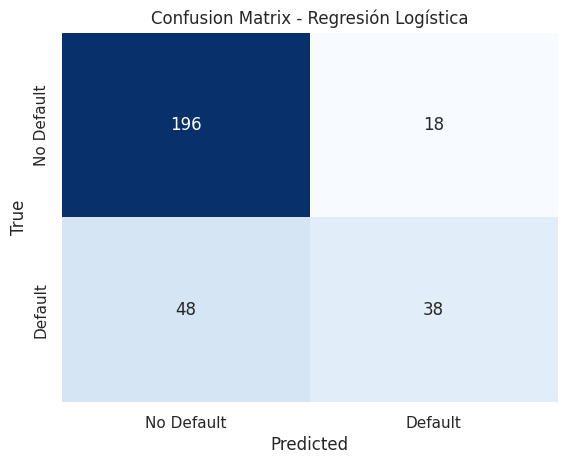

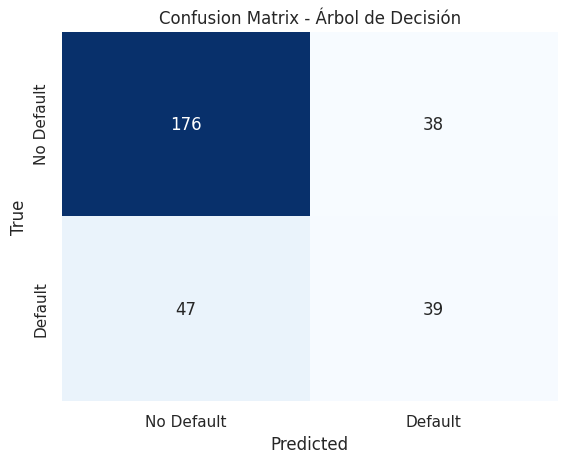

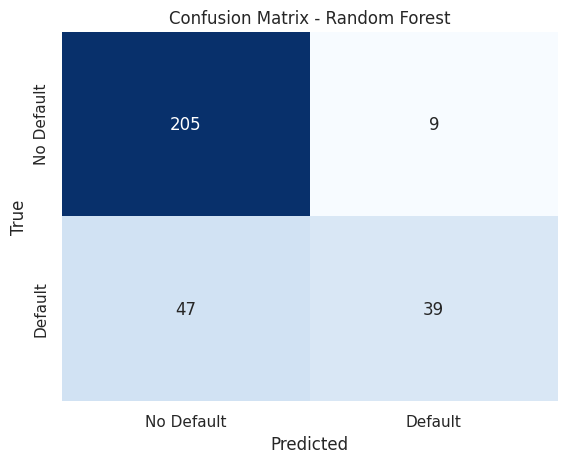

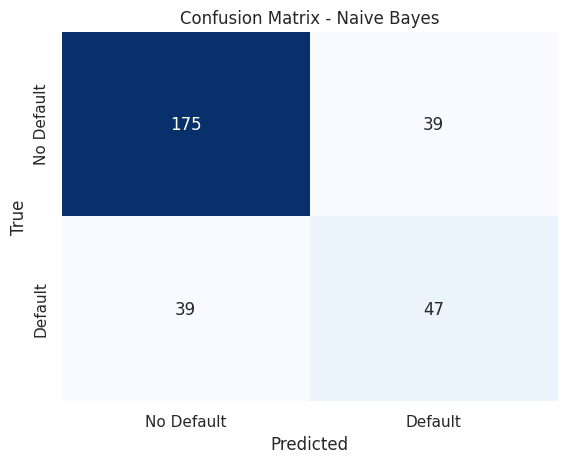

In [90]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def crea_modelos():
    global df_banco, resultados, confusion_matrix
    y = df_banco['default']
    x = df_banco.drop(columns='default')
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state=77)

    models = {
        'Regresión Logística': LogisticRegression(),
        'Árbol de Decisión': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB()
    }

    results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

    for name, model in models.items():
        model.fit(train_x, train_y)
        predictions = model.predict(test_x)
        accuracy = accuracy_score(test_y, predictions)
        precision = precision_score(test_y, predictions)
        recall = recall_score(test_y, predictions)
        f1 = f1_score(test_y, predictions)
        if hasattr(model, "predict_proba"):
            proba = model.predict_proba(test_x)
            roc_auc = roc_auc_score(test_y, proba[:, 1])
        else:
            roc_auc = None

        # Confusion matrix
        # Calcula la matriz de confusión
        cm = confusion_matrix(test_y, predictions)
        plt.figure()
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
        plt.title(f'Confusion Matrix - {name}')  # Configura el título del gráfico
        plt.xlabel('Predicted')  # Etiqueta del eje X
        plt.ylabel('True')  # Etiqueta del eje Y
        plt.show()  # Muestra el gráfico de la matriz de confusión

        # Almacena los resultados en el diccionario
        results['Model'].append(name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-score'].append(f1)
        results['AUC-ROC'].append(roc_auc)

    resultados = results

crea_modelos()




**Regresión Logística:**

En el caso de la Regresión Logística, se
observan los siguientes resultados:

*   Verdaderos Positivos (VP): 38 clientes identificados correctamente como incumplidores.
*   Falsos Negativos (FN): 48 clientes que incumplieron pero fueron clasificados incorrectamente como no incumplidores.
*   Falsos Positivos (FP): 18 clientes clasificados como incumplidores, pero que en realidad no lo hicieron.
*   Verdaderos Negativos (VN): 196 clientes correctamente clasificados como no incumplidores.

**Árbol de Decisión:**

En el caso del árbol de decisión, se
observan los siguientes resultados:

*   Verdaderos Positivos (VP): 38 clientes identificados correctamente como incumplidores.
*   Falsos Negativos (FN): 48 clientes que incumplieron pero fueron clasificados incorrectamente como no incumplidores.
*   Falsos Positivos (FP): 42 clientes clasificados como incumplidores, pero que en realidad no lo hicieron.
*   Verdaderos Negativos (VN): 172 clientes correctamente clasificados como no incumplidores.

**Random Forest:**

En el caso del random forest, se
observan los siguientes resultados:

*   Verdaderos Positivos (VP): 35 clientes identificados correctamente como incumplidores.
*   Falsos Negativos (FN): 51 clientes que incumplieron pero fueron clasificados incorrectamente como no incumplidores.
*   Falsos Positivos (FP): 15 clientes clasificados como incumplidores, pero que en realidad no lo hicieron.
*   Verdaderos Negativos (VN): 199 clientes correctamente clasificados como no incumplidores.

**Naive Bayes:**

En el caso del random forest, se
observan los siguientes resultados:

*   Verdaderos Positivos (VP): 47 clientes identificados correctamente como incumplidores.
*   Falsos Negativos (FN): 39 clientes que incumplieron pero fueron clasificados incorrectamente como no incumplidores.
*   Falsos Positivos (FP): 39 clientes clasificados como incumplidores, pero que en realidad no lo hicieron.
*   Verdaderos Negativos (VN): 175 clientes correctamente clasificados como no incumplidores.

**Conclusión**

Podemos notar que de los cuatro modelos, el que menor Falsos positivos presenta en el método de Regresión Lineal, así que podría ser el mejor modelo para utilizar.

##Desafío 2

Balancear la variable target

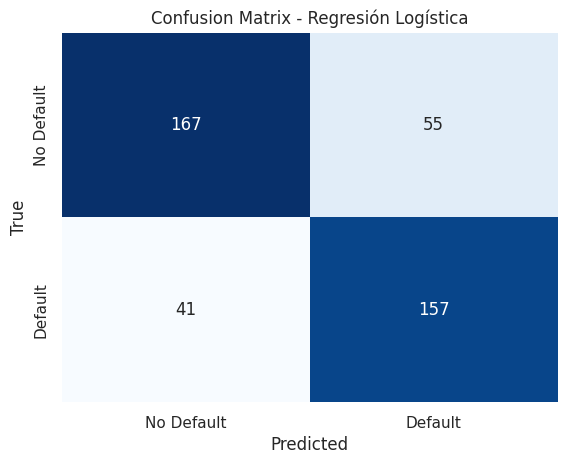

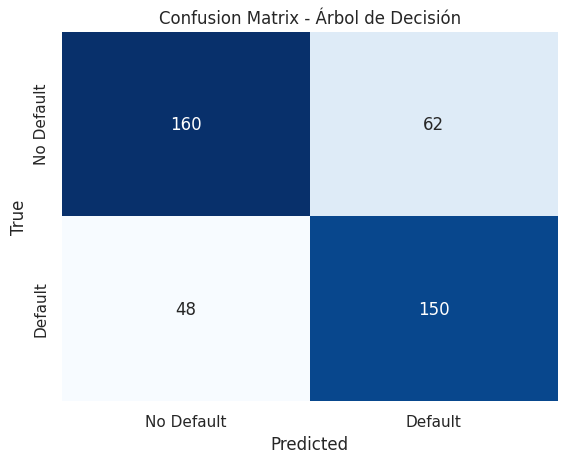

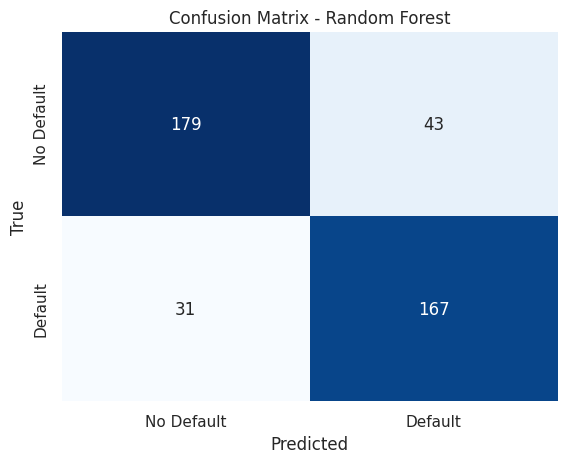

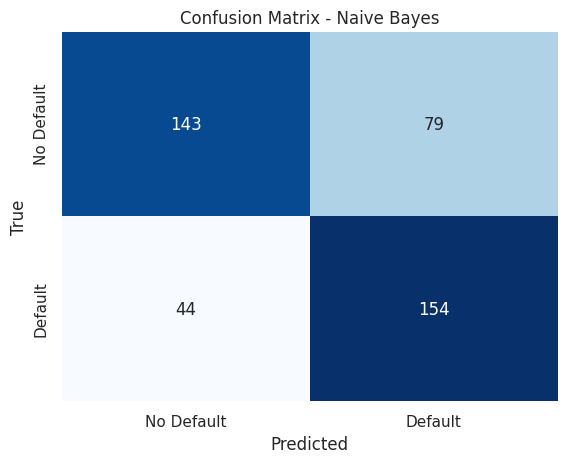

In [93]:
def aplica_oversampling(X, y):
    # Aplica oversampling utilizando SMOTE
    smote = SMOTE(random_state=77)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

def crea_modelos(df):
    global df_banco, resultados, confusion_matrix
    df_banco = df.copy()  # Asegúrate de trabajar con una copia del DataFrame original
    y = df_banco['default']
    x = df_banco.drop(columns='default')

    # Aplica oversampling
    x_resampled, y_resampled = aplica_oversampling(x, y)

    train_x, test_x, train_y, test_y = train_test_split(x_resampled, y_resampled, test_size=0.30, random_state=77)

    models = {
        'Regresión Logística': LogisticRegression(),
        'Árbol de Decisión': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB()
    }

    results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

    for name, model in models.items():
        model.fit(train_x, train_y)
        predictions = model.predict(test_x)
        accuracy = accuracy_score(test_y, predictions)
        precision = precision_score(test_y, predictions)
        recall = recall_score(test_y, predictions)
        f1 = f1_score(test_y, predictions)
        if hasattr(model, "predict_proba"):
            proba = model.predict_proba(test_x)
            roc_auc = roc_auc_score(test_y, proba[:, 1])
        else:
            roc_auc = None

        # Confusion matrix
        # Calcula la matriz de confusión
        cm = confusion_matrix(test_y, predictions)
        plt.figure()
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
        plt.title(f'Confusion Matrix - {name}')  # Configura el título del gráfico
        plt.xlabel('Predicted')  # Etiqueta del eje X
        plt.ylabel('True')  # Etiqueta del eje Y
        plt.show()  # Muestra el gráfico de la matriz de confusión

        # Almacena los resultados en el diccionario
        results['Model'].append(name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-score'].append(f1)
        results['AUC-ROC'].append(roc_auc)

    resultados = results

# Llamada a la función con tu DataFrame original
crea_modelos(df_banco)

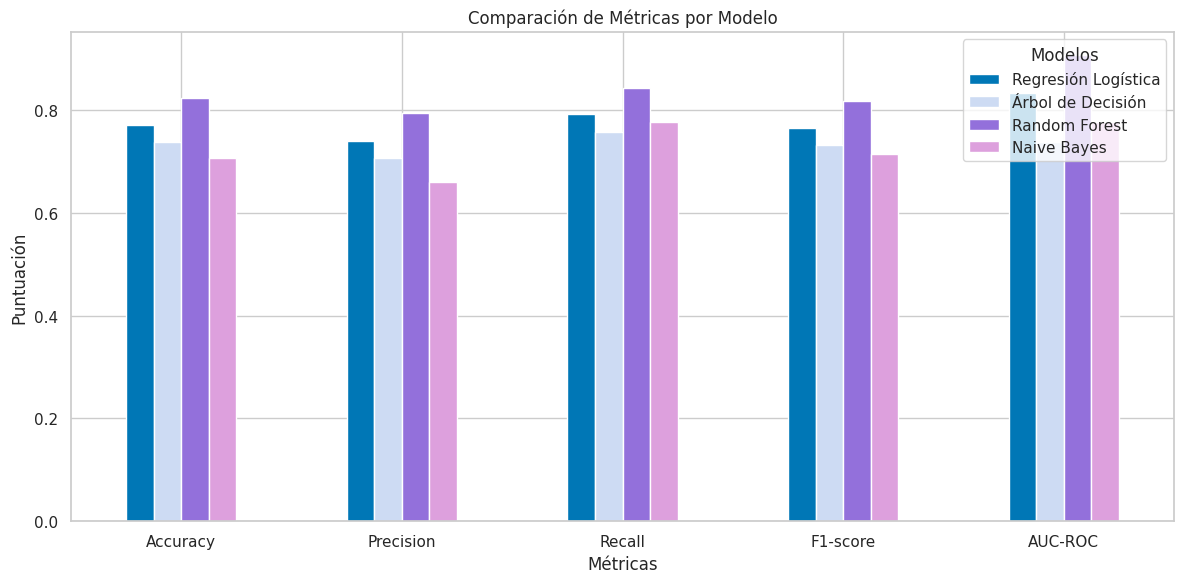

In [96]:
visualiza_resultados()

Después de realizar el balance del target podemos notar una mejoría en todos los modelos utilizados, pero en peculiar, el modelo de Random Forest es mejor que todos los demás, y este mejoró demasiado en la metricas de Recall y F1-Score a comparación de las primeras gráficas.

##Desafío 3

Seleccionar sólo algunas variable y reevaluar

In [97]:
df_banco2 = df_banco.loc[:, ['default', 'rango_plazos_credito','credit_history', 'account_check_status', 'property' ,'sexo','estado_civil']]
df_banco2.sample(6)

,default,rango_plazos_credito,credit_history,account_check_status,property,sexo,estado_civil
503,1,2,5,2,4,0,1
48,0,1,5,4,2,0,1
157,0,1,2,1,3,0,0
376,0,2,4,4,1,0,0
689,0,1,3,1,2,0,1
186,1,1,2,2,4,1,0


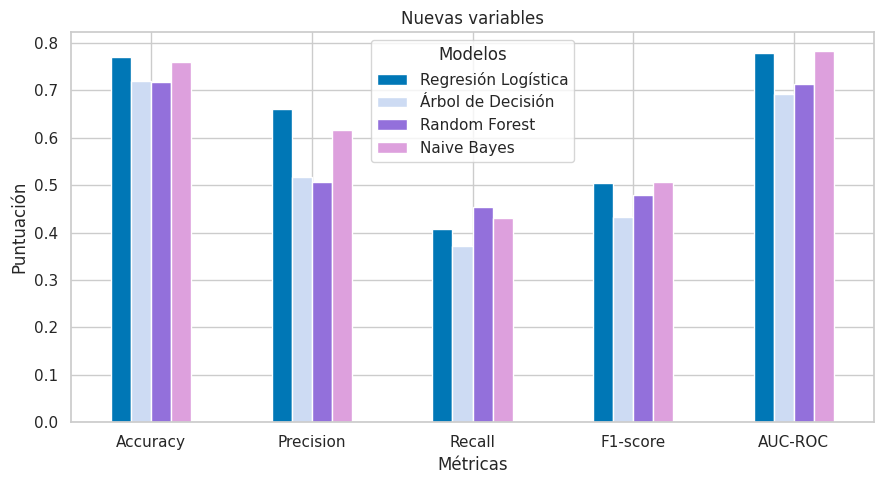

In [100]:
def crea_modelos():
    global df_banco, resultados
    df_banco2 = df_banco.loc[:, ['default', 'rango_plazos_credito','credit_history', 'account_check_status', 'property' ,'sexo','estado_civil']]
    y = df_banco2['default']
    x = df_banco2.drop(columns='default')
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state=77)

    models = {
        'Regresión Logística': LogisticRegression(),
        'Árbol de Decisión': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB()
    }
    # Listas
    results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

    for name, model in models.items():
        model.fit(train_x, train_y)  # Entrenamiento
        predictions = model.predict(test_x)  # Incorporación de métricas
        accuracy = accuracy_score(test_y, predictions)
        precision = precision_score(test_y, predictions)
        recall = recall_score(test_y, predictions)
        f1 = f1_score(test_y, predictions)
        if hasattr(model, "predict_proba"):
            proba = model.predict_proba(test_x)
            roc_auc = roc_auc_score(test_y, proba[:, 1])
        else:
            roc_auc = None

        results['Model'].append(name)  # Incorporación de las métricas a la lista
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-score'].append(f1)
        results['AUC-ROC'].append(roc_auc)

    resultados = results

def visualiza_resultados():
    global df_banco2, resultados
    results_df = pd.DataFrame(resultados) #Transformacion a dataframe
    results_df.set_index('Model', inplace=True) #Grafico separado por metricas

    # Transponer el DataFrame para facilitar la representación
    results_df = results_df.T
    colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']

    # Gráfico de barras agrupadas para cada métrica
    results_df.plot(kind='bar', figsize=(9, 5), colormap='viridis', rot=0, color=colors)
    plt.title('Nuevas variables')
    plt.xlabel('Métricas')
    plt.ylabel('Puntuación')
    plt.legend(title='Modelos')
    plt.tight_layout() #Reducir espacios varios
    plt.show()

crea_modelos()
visualiza_resultados()

Después de cambiar las variables a analizar, podemos notar una mejoría en la regresión logistica. Esto nos demuestra que el uso de los modelos es completamente dependiente del contexto y uso que le daremos a dicho modelo.